In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Read the Excel file into a DataFrame
df = pd.read_excel('quiz1.xlsx', sheet_name='usnews3.data.9 .SS (v5.0)')
df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Public (1)/ Private (2),1302.0,1.639017,0.480470,1.0,1.00,2.0,2.00,2.0
# appli. rec'd,1292.0,2752.097523,3541.974712,35.0,695.75,1470.0,3314.25,48094.0
# appl. accepted,1291.0,1870.683191,2250.866400,35.0,554.50,1095.0,2303.00,26330.0
# new stud. enrolled,1297.0,778.880493,884.578274,18.0,236.00,447.0,984.00,7425.0
% new stud. from top 10%,1067.0,25.671978,18.312618,1.0,13.00,21.0,32.00,98.0
% new stud. from top 25%,1100.0,52.350000,20.881316,6.0,36.75,50.0,66.00,100.0
# FT undergrad,1299.0,3692.665127,4544.847897,59.0,966.00,1812.0,4539.50,31643.0
# PT undergrad,1270.0,1081.526772,1672.202912,1.0,131.25,472.0,1313.00,21836.0
in-state tuition,1272.0,7897.274371,5348.162626,480.0,2580.00,8050.0,11600.00,25750.0
out-of-state tuition,1282.0,9276.905616,4170.770851,1044.0,6111.00,8670.0,11659.00,25750.0


In [4]:
#Check if there are any duplicate colleges based on both name and state.

is_duplicate = df.duplicated(subset=['College Name', 'State'])
duplicated_rows = df[is_duplicate]
duplicated_rows

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate


In [5]:
#Summary statistics for the target variable Graduation Rate

target_stats = df['Graduation rate'].describe()
print(target_stats)

count    1204.000000
mean       60.405316
std        18.889058
min         8.000000
25%        47.000000
50%        60.000000
75%        74.000000
max       118.000000
Name: Graduation rate, dtype: float64


The maximum value of the target variable is 118 which is higher than the 100% rate that should be possible.

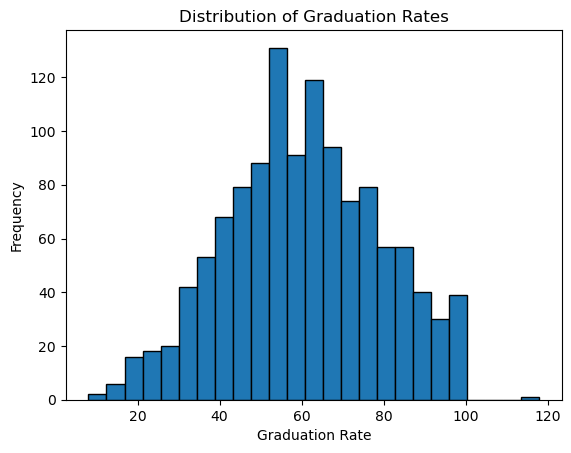

In [6]:
# Plot histogram
plt.hist(df['Graduation rate'], bins=25, edgecolor='k')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Graduation Rates')
plt.show()

The histogram of the target variable shows that there is one college above the 100% graduation rate now we will take a look at that college.

In [7]:
df[df['Graduation rate'] == 118.0]

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
771,Cazenovia College,NY,2,3847.0,3433.0,527.0,9.0,35.0,1010.0,12.0,9384.0,9384.0,2420.0,2420.0,395.0,600.0,500.0,22.0,14.3,118.0


In [8]:
df.loc[df['College Name'] == 'Cazenovia College', 'Graduation rate'] = 57.8

In [9]:
df['Graduation rate'].describe()

count    1204.000000
mean       60.355316
std        18.816011
min         8.000000
25%        47.000000
50%        60.000000
75%        74.000000
max       100.000000
Name: Graduation rate, dtype: float64

Now graduation rate only goes to the maximum value of 100.

In [10]:
null_counts = df.isnull().sum()
print(null_counts)

College Name                  0
State                         0
Public (1)/ Private (2)       0
# appli. rec'd               10
# appl. accepted             11
# new stud. enrolled          5
% new stud. from top 10%    235
% new stud. from top 25%    202
# FT undergrad                3
# PT undergrad               32
in-state tuition             30
out-of-state tuition         20
room                        321
board                       498
add. fees                   274
estim. book costs            48
estim. personal $           181
% fac. w/PHD                 32
stud./fac. ratio              2
Graduation rate              98
dtype: int64


Before dealing with null values I want to remove the rows that have nulls in the target column as imputing is not guaranteed to be an accurate depiction of the data

In [11]:
df = df.dropna(subset=['Graduation rate'])
null_counts = df.isnull().sum()
print(null_counts)

College Name                  0
State                         0
Public (1)/ Private (2)       0
# appli. rec'd                6
# appl. accepted              5
# new stud. enrolled          2
% new stud. from top 10%    194
% new stud. from top 25%    163
# FT undergrad                3
# PT undergrad               30
in-state tuition             28
out-of-state tuition         17
room                        289
board                       451
add. fees                   252
estim. book costs            36
estim. personal $           148
% fac. w/PHD                 27
stud./fac. ratio              0
Graduation rate               0
dtype: int64


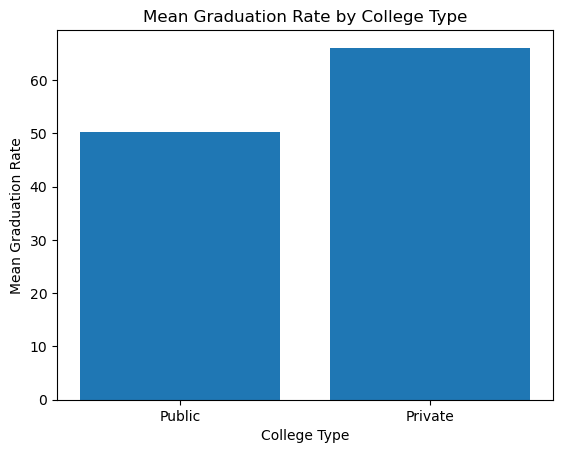

In [12]:
# Group the data by the 'Public (1)/ Private (2)' column and calculate the mean graduation rate
grouped = df.groupby('Public (1)/ Private (2)')
mean_grad_rate = grouped['Graduation rate'].mean()

# Plot the mean graduation rates
labels = ['Public', 'Private']
plt.bar(labels, mean_grad_rate)
plt.xlabel('College Type')
plt.ylabel('Mean Graduation Rate')
plt.title('Mean Graduation Rate by College Type')
plt.show()

College type will likely be a good indicator of graduation rate with Private college students graduating at an average rate over 10% higher than public universities

In [13]:
# Impute null values with column medians
df_filled = df.fillna(df.median(numeric_only=True))

# Check for remaining null values
null_counts = df_filled.isnull().sum()
print(null_counts)

College Name                0
State                       0
Public (1)/ Private (2)     0
# appli. rec'd              0
# appl. accepted            0
# new stud. enrolled        0
% new stud. from top 10%    0
% new stud. from top 25%    0
# FT undergrad              0
# PT undergrad              0
in-state tuition            0
out-of-state tuition        0
room                        0
board                       0
add. fees                   0
estim. book costs           0
estim. personal $           0
% fac. w/PHD                0
stud./fac. ratio            0
Graduation rate             0
dtype: int64


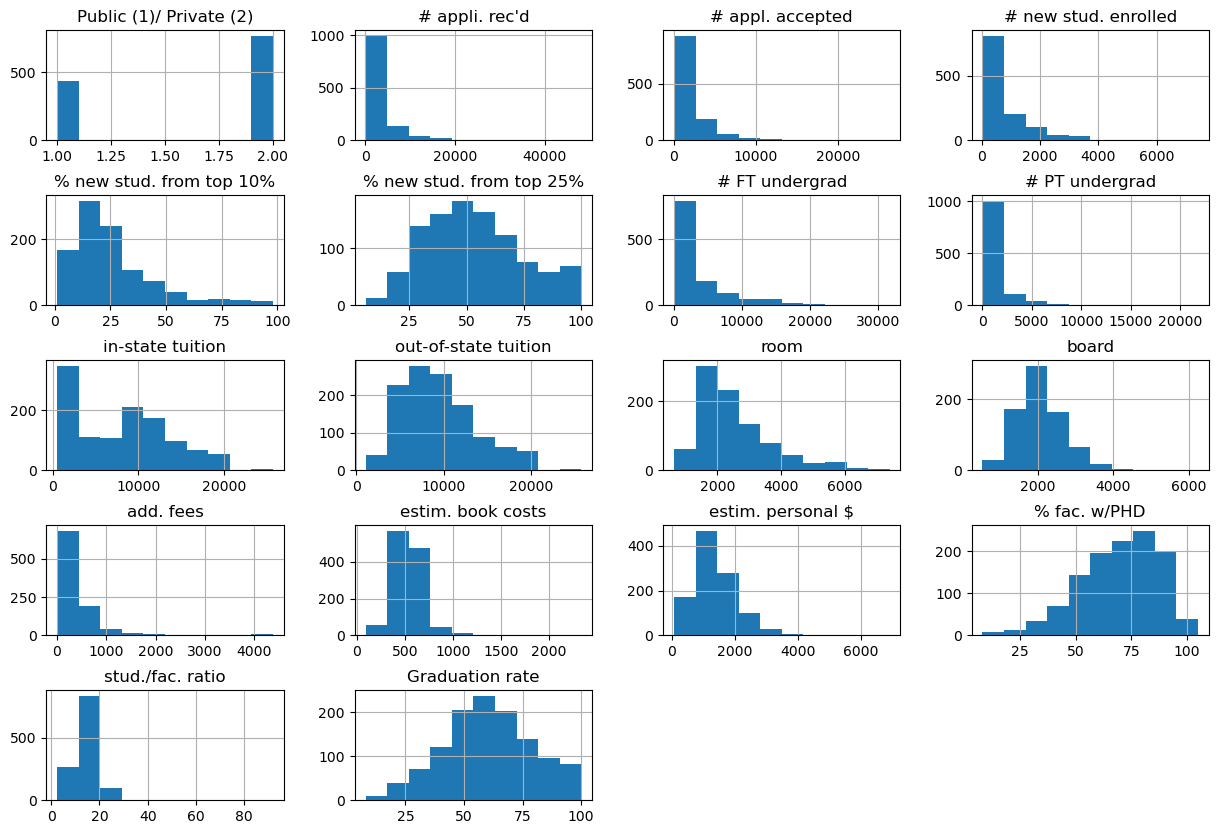

In [14]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5);

# PCA Analysis for Feature Selection

In [15]:
# Drop the "College Name" and "State" columns from the DataFrame used for PCA
df_pca = df_filled.drop(["College Name", "State"], axis=1)

# Create separate variables for the "College Name" and "State" columns
college_names = df_filled["College Name"]
states = df_filled["State"]

In [16]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

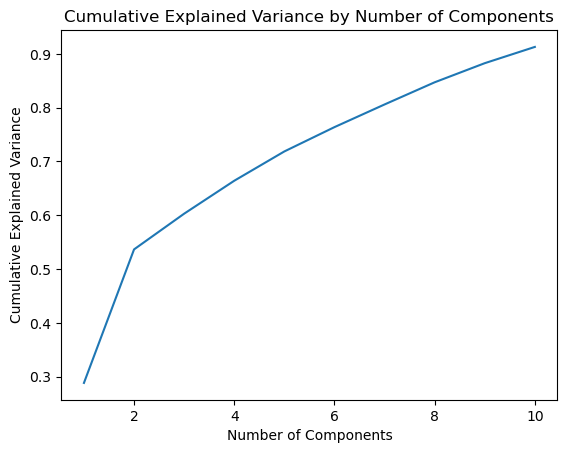

In [17]:
# Plot cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')

plt.show()

Text(0.5, 1.0, 'PCA Components')

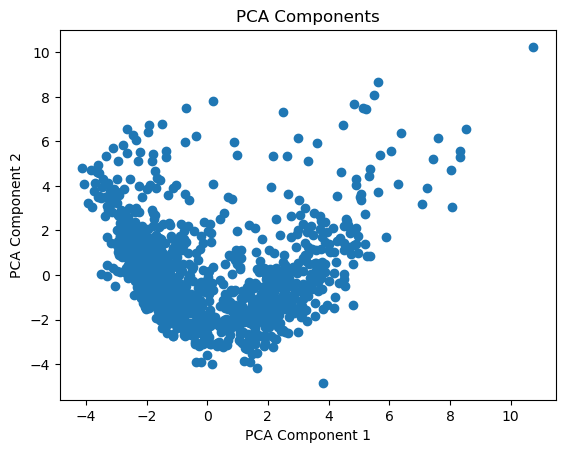

In [18]:
# Plot scatter plot of PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Components')

The scatter plot of the PCA components provides visual insights into the relationship between the data points in the reduced-dimensional space. In this case, the scatter plot shows the distribution and clustering of the data points based on their values in the first two principal components.

The scatter plot appears to exhibit a parabolic or curved pattern, indicating a potential non-linear relationship among the data points. The curvature suggests that there may be complex interactions or higher-order patterns present in the data that are not easily captured by a linear model.

In [19]:
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio for each component
for i, variance_ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {variance_ratio:.4f}")

Component 1: 0.2882
Component 2: 0.2483
Component 3: 0.0664
Component 4: 0.0612
Component 5: 0.0545
Component 6: 0.0452
Component 7: 0.0422
Component 8: 0.0412
Component 9: 0.0355
Component 10: 0.0302


Components 1 and 2 collectively explain approximately 53% of the total variance in the dataset. This indicates that these two components capture a significant portion of the variability present in the original features. The relatively high explained variance suggests that these components contain valuable information for predicting the target variable, graduation rate.

On the other hand, components 3 and above contribute much less to the overall variance explained, with component 3 explaining less than 7% of the variance. This suggests that the additional components beyond the first two contribute relatively less information compared to the initial components. These components may capture more noise or less meaningful patterns in the data.

In summary, components 1 and 2 capture a substantial amount of the variance in the dataset, while the remaining components contribute relatively less. By focusing on these important components, we can effectively reduce the dimensionality of the data while retaining key information for predicting graduation rates.

# Possible ML for Predicting Graduation Rate

1) Polynomial Regression: Since the scatter plot exhibits a parabolic or curved pattern, polynomial regression can be explored as a model that can capture non-linear relationships. By including polynomial terms of the principal components as additional features, a polynomial regression model may better capture the non-linearities in the data.

2) Random Forest Regression: Random forest regression is an ensemble learning model that can handle non-linear relationships effectively. It combines multiple decision trees to make predictions and can capture complex interactions and patterns in the data. By utilizing the principal components as input features, a random forest regression model may provide accurate predictions of graduation rates.

3) Linear Regression: Despite the presence of non-linear patterns in the scatter plot, it is still worth considering a linear regression model as a baseline approach. By using the principal components as input features, we can build a linear regression model to estimate graduation rates. However, it is important to keep in mind that the linear regression model may not capture the full complexity of the underlying relationships.

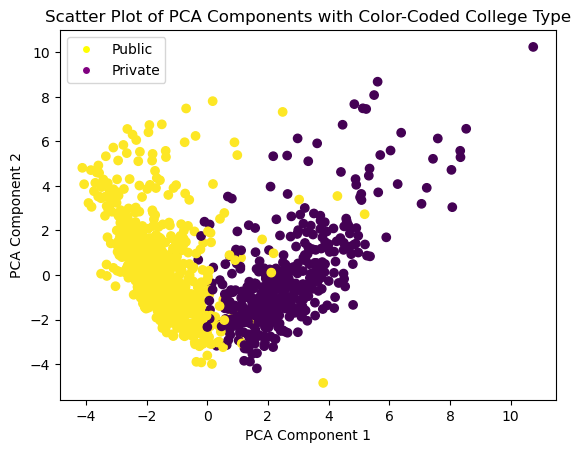

In [22]:
# Create a new DataFrame with PCA components and college type
df_pca_collegetype = pd.DataFrame({
    'PCA Component 1': X_pca[:, 0],
    'PCA Component 2': X_pca[:, 1],
    'College Type': df_filled['Public (1)/ Private (2)']
})

# Plot scatter plot with color-coded points
plt.scatter(df_pca_collegetype['PCA Component 1'], df_pca_collegetype['PCA Component 2'],
            c=df_pca_collegetype['College Type'])

# Add labels, titles, legends, etc. to the plot
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of PCA Components with Color-Coded College Type')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', label='Public'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', label='Private')]
plt.legend(handles=legend_elements)

# Show the plot
plt.show()

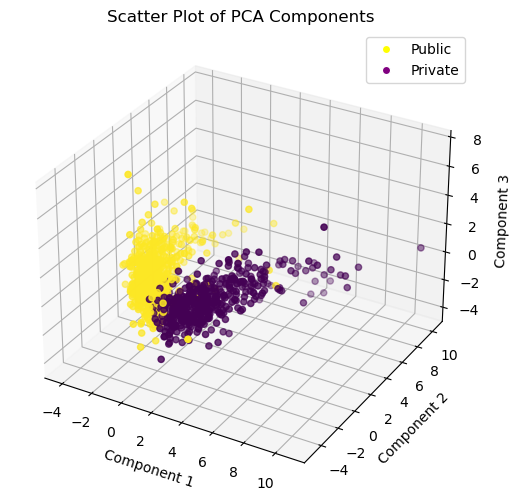

In [25]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points with different colors based on college type
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_filled['Public (1)/ Private (2)'], cmap='viridis')

# Set labels for the three axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Set title for the plot
ax.set_title('Scatter Plot of PCA Components')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', label='Public'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', label='Private')]
plt.legend(handles=legend_elements)

# Display the plot
plt.show()